# **HOTEL BOOKING DEMAND - PREDICTIVE ANALYSIS**

> ## By: Kenshi Poneva

# 1. **BUSINESS PROBLEM & DATA UNDERSTANDING**

> ## *Context*

Every year, more than 140 million bookings made on the internet and many hotel bookings made through top-visited travel websites like Booking.com, Expedia.com, Hotels.com, etc. According to Google data, hotels are booked in advance of 12 weeks.

The original dataset contains 31 features about booking information such as Average Daily Rate, Arrival Time, Room Type, Special Request, etc. between 2015 and 2017 years.

In this kernel, I would like to show some booking information details with exploratory data analysis, some feature engineering, reviewing correlations between features, hyperparameter tuning and model performance. As a result of all these analyses, I aim to find best model to predict hotel booking cancellations with an algorithm that gives best performance. The goal of predictive analysis is to avoid overfitting and find the model that has the highest accuracy.

> ## *Business Problem*

**Problem**:  
How to predict the guests who are most likely to cancel and not cancel their reservation? Will this help to generate better forecasts and reduce business decision uncertainty?

**Data**:  
The dataset provides information to help us find evaluate feature importance i.e. which features are most important to predict hotel booking cancellations.

**ML Objective**:  
To build a model that could predict bookings with a high cancellation probability.

**Action**:  
Results allow hotel managers to accurately predict net demand and build better forecasts, improve cancellation policies, define better overbooking tactics and thus use more assertive pricing and inventory allocation strategies.

**Value**:
- To mitigate revenue loss derived from booking cancellations
- To mitigate the risks associated  with overbooking (reallocation costs, cash or service compensations, and particularly important today, social reputation costs)

> ## *Data Understanding*

The data is originally from the article [Hotel Booking Demand Datasets](https://www.sciencedirect.com/science/article/pii/S2352340918315191), written by Nuno Antonio, Ana Almeida, and Luis Nunes for Data in Brief, Volume 22, February 2019.

The data was downloaded and cleaned by Thomas Mock and Antoine Bichat for #TidyTuesday during the week of February 11th, 2020. Source of data: https://www.kaggle.com/jessemostipak/hotel-booking-demand

This dataset consists of guest booking information of one of the world’s major leading chain of hotels, homes and spaces. The information given should be used to build some predictive models to classify whether a hotel booking is likely to be canceled, which can affect the revenue stream. Further details about each features/columns as follows:

> ### *Feature Description*

1. `country`  
Country of origin. Categories are represented in the ISO 3155–3:2013 format.

2. `market_segment`  
A group of people who share one or more common characteristics, lumped together for marketing purposes. 
    - TA: Travel agents
    - TO: Tour operators  
<br />    

3. `previous_cancellations`  
Number of previous bookings that were cancelled by the customer prior to the current booking.

4. `booking_changes`  
Number of changes/amendments made to the booking from the moment the booking was entered on the PMS (Property Management System) until the moment of check-in or cancellation.

5. `deposit_type`  
Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.

6. `day_in_waiting_list`  
Number of days the booking was in the waiting list before it was confirmed to the customer.

7. `customer_type`  
    Contract - when the booking has an allotment or other type of contract associated to it;  
    Group – when the booking is associated to a group;  
    Transient – when the booking is not part of a group or contract, and is not associated to other transient booking;  
    Transient-party – when the booking is transient, but is associated to at least other transient booking
    
8. `reserved_room_type`  
Code of room type reserved. Code is presented instead of designation for anonymity reasons.

9. `required_car_parking_spaces`  
Number of car parking spaces required by the customer

10. `total_of_special_requests`  
Number of special requests made by the customer (e.g. twin bed or high floor)

11. ``is_canceled``  
    1: Canceled  
    0: Not canceled

> ### *Import Libraries*

In [543]:
# data analysis library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import missingno

# data splitting 
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

# preprocessing
import sklearn
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import category_encoders as ce

# features selection
from sklearn.feature_selection import SelectKBest, SelectFromModel, RFE
from sklearn.feature_selection import SelectPercentile, f_classif, mutual_info_classif

# model
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, StackingClassifier, BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier, Pool
from sklearn.ensemble import ExtraTreesClassifier

# metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay

# tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')


In [41]:
# install missingno

# conda install -c conda-forge missingno 

In [380]:
# load data
df_ori = pd.read_csv('data_hotel_booking_demand.csv')

In [381]:
df_hotel = df_ori.copy()

df_hotel.head()

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2,0


In [318]:
print(df_ori.shape)
print(df_hotel.shape)

(83573, 11)
(83573, 11)


In [382]:
df_hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83573 entries, 0 to 83572
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   country                      83222 non-null  object
 1   market_segment               83573 non-null  object
 2   previous_cancellations       83573 non-null  int64 
 3   booking_changes              83573 non-null  int64 
 4   deposit_type                 83573 non-null  object
 5   days_in_waiting_list         83573 non-null  int64 
 6   customer_type                83573 non-null  object
 7   reserved_room_type           83573 non-null  object
 8   required_car_parking_spaces  83573 non-null  int64 
 9   total_of_special_requests    83573 non-null  int64 
 10  is_canceled                  83573 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 7.0+ MB


In [383]:
# check more info in each features

list_item = []
for col in df_hotel.columns:
    list_item.append([col, df_hotel[col].dtype, len(df_hotel), df_hotel[col].isna().sum(), round((df_hotel[col].isna().sum()/len(df_hotel[col]))*100,2),
    df_hotel[col].nunique(), list(df_hotel[col].drop_duplicates().sample(2, replace=True).values)])

df_items_info = pd.DataFrame(columns=['Column Name', 'Data Type', 'Data Count', 'Missing Value', 
    'Missing Value %', 'Number of Unique', 'Unique Sample'],
    data = list_item)

df_items_info

,Column Name,Data Type,Data Count,Missing Value,Missing Value %,Number of Unique,Unique Sample
0,country,object,83573,351,0.42,162,"[SVN, PRY]"
1,market_segment,object,83573,0,0.00,8,"[Complementary, Corporate]"
2,previous_cancellations,int64,83573,0,0.00,15,"[0, 3]"
3,booking_changes,int64,83573,0,0.00,19,"[3, 7]"
4,deposit_type,object,83573,0,0.00,3,"[Non Refund, No Deposit]"
5,days_in_waiting_list,int64,83573,0,0.00,115,"[19, 42]"
6,customer_type,object,83573,0,0.00,4,"[Transient-Party, Contract]"
7,reserved_room_type,object,83573,0,0.00,10,"[B, A]"
8,required_car_parking_spaces,int64,83573,0,0.00,5,"[2, 3]"
9,total_of_special_requests,int64,83573,0,0.00,6,"[2, 1]"


**Data Summary**  

Missing Value:  
The only feature that has missing value is `country` that only takes 0.42% out of the whole data. 

Categorical Data:  
We have 5 categorical data such as `country`, `market_segment`, `deposit_type`, `customer_type`, and `reserved_room_type`.

Numerical Data:  
Following are the numerical features in our data: `previous_cancellations`, `booking_changes`, `days_in_waiting_list`, `required_car_parking_spaces`, and `total_of_special_requests`.

Target:
the feature that will be considered as our target is `is_canceled`, where 0 indicates `not canceled` and 1 as `canceled`.



# 2. **EDA**

> ## *Data Splitting*

In [384]:
# train test split
df_hotel_train, df_hotel_test = train_test_split(df_hotel, random_state = 89, stratify = df_hotel['is_canceled'])

In [385]:
# check ratio
print(df_hotel_train['is_canceled'].value_counts(normalize=True))
print('========')
print(df_hotel_test['is_canceled'].value_counts(normalize=True))

0    0.631727
1    0.368273
Name: is_canceled, dtype: float64
0    0.631712
1    0.368288
Name: is_canceled, dtype: float64


**Target**

    0: Not canceled
    1: Canceled  
    

> ## *Data Visualisation*

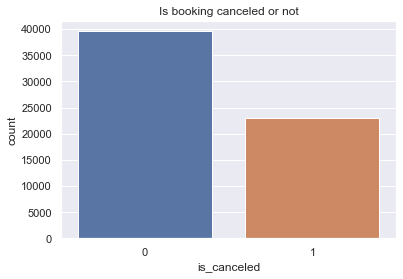

In [386]:
# How many bookings were cancelled at the Hotel?
sns.set(style = "darkgrid")
plt.title("Is booking canceled or not")
ax = sns.countplot(x = "is_canceled", data = df_hotel_train)

**Summary 1**  
According to the this graph, 63% of bookings were not canceled and 37% of the bookings were canceled at the Hotel.

In [387]:
# recheck categorical and numerical features
ctg_cols = [col for col in df_hotel_train.columns if df_hotel_train[col].dtype=='object']
print('Categorical features are: ', ctg_cols)

num_cols = [col for col in df_hotel_train.columns if df_hotel_train[col].dtype!='object' and col!='is_canceled']
print('Numerical features are: ', num_cols)

Categorical features are:  ['country', 'market_segment', 'deposit_type', 'customer_type', 'reserved_room_type']
Numerical features are:  ['previous_cancellations', 'booking_changes', 'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests']


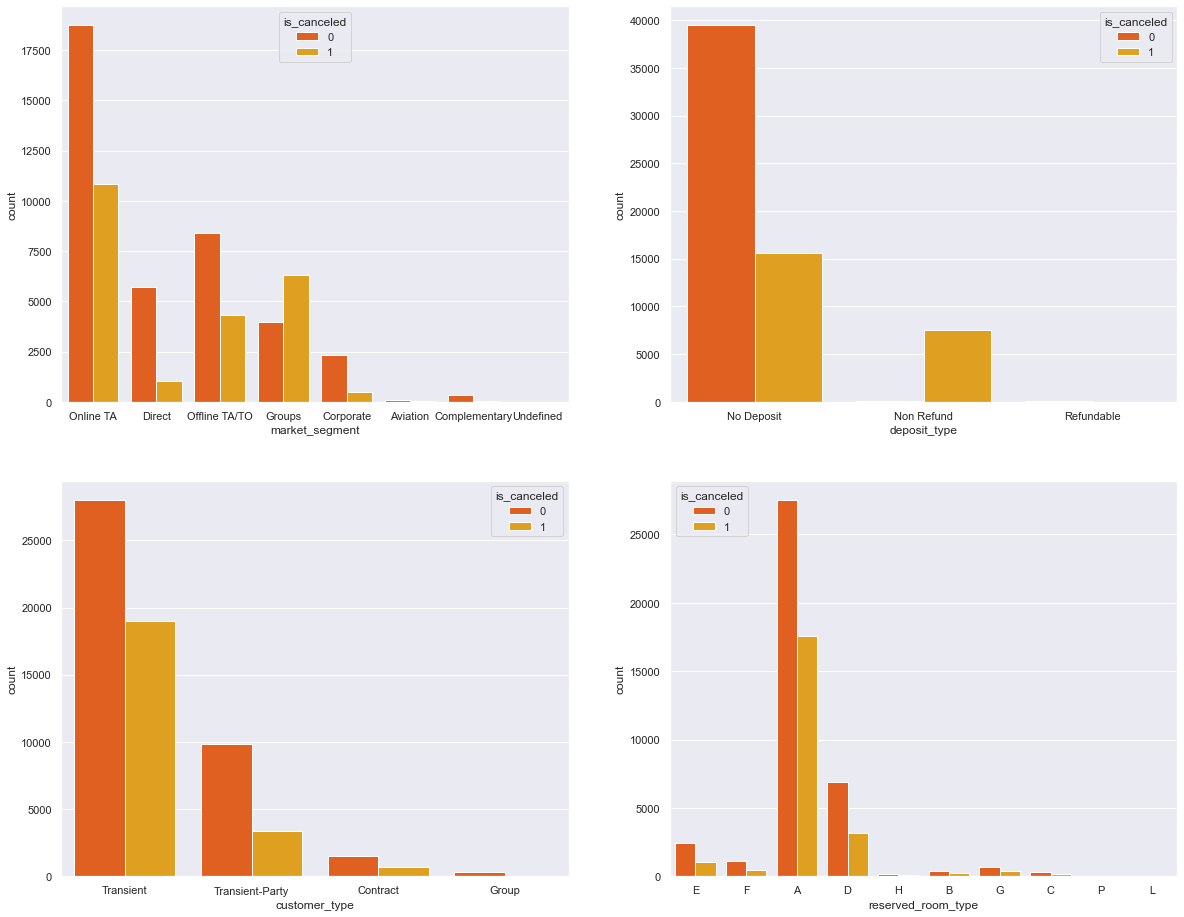

In [388]:
# select all features that have object types
categorical_var = df_hotel_train.dtypes[df_hotel_train.dtypes == object][1:].index.tolist()

# create 14 empty plots
fig, ax = plt.subplots(2, 2,figsize=(20,16))

# iterate those selected variables visualised in barplot
for ix, ctg in enumerate(categorical_var):
    sns.countplot(x = ctg, hue = 'is_canceled', data = df_hotel_train, palette= 'autumn', ax = ax.flatten()[ix])

In [389]:
# Calculate Percentage
df_hotel_train.groupby(['customer_type'])['is_canceled'].value_counts(normalize=True)

customer_type    is_canceled
Contract         0              0.689704
                 1              0.310296
Group            0              0.907975
                 1              0.092025
Transient        0              0.595791
                 1              0.404209
Transient-Party  0              0.743743
                 1              0.256257
Name: is_canceled, dtype: float64

**Summary 2**

1. Majority of the distribution channels and market segments involve travel agencies (online or offline). We can target our marketing area to be on these travel agencies website and work with them since majority of the visitors tend to reach out to them. Speaking of cancellation rate, only 'Groups' segment that tend to have cancellation rate which surpassed the non_cancelled. We suggest that the Online TA and offline TA/TO segment have the highest rate of booking cancellation although it has been surpassed by their 'non_cancelled' bookings. The lowest cancelled rate came from 'Direct' segment and 'Corporate' segment. From hear I conclude that the fact of cancellations are made collectively like group reservations has high cancellation rate. Obviously, cancellation rates for online reservations are high as expected in a dynamic environment where the circulation is high. Another situation that took my attention is that the cancellation rate in the direct segment is so low. At this point, I believe a relationship of mutual trust has been established in the event that individuals communicate one by one.

2. Around 28% of bookings were canceled by guests with no deposit, followed by 18% bookings were canceled with Refundable. These numbers are huge if the hotels were not able to replace the cancelled bookings in time. So it's obvious that guests who do not pay any deposit while booking are likely to cancel more reservations. Also it is interesting to note that non-refundable deposits had more cancellation than refundable deposits. Logically one would have assumed that refundable deposits have more cancellation as hotel rates are usually higher for refundable deposit type rooms and customers pay more in anticipation of cancellation.

3. Majority of the bookings are transient that also has higher cancellation rate. Transient Guests are guests making reservation on their own, usually directly with the hotel. This group includes walk-in guests, business travelers, last-minute bookers and those who require a short-term stay. 

4. Room type of A has more bookings with higher cancellations. Personally, this feature might not be one of my options for doing further analysis. 


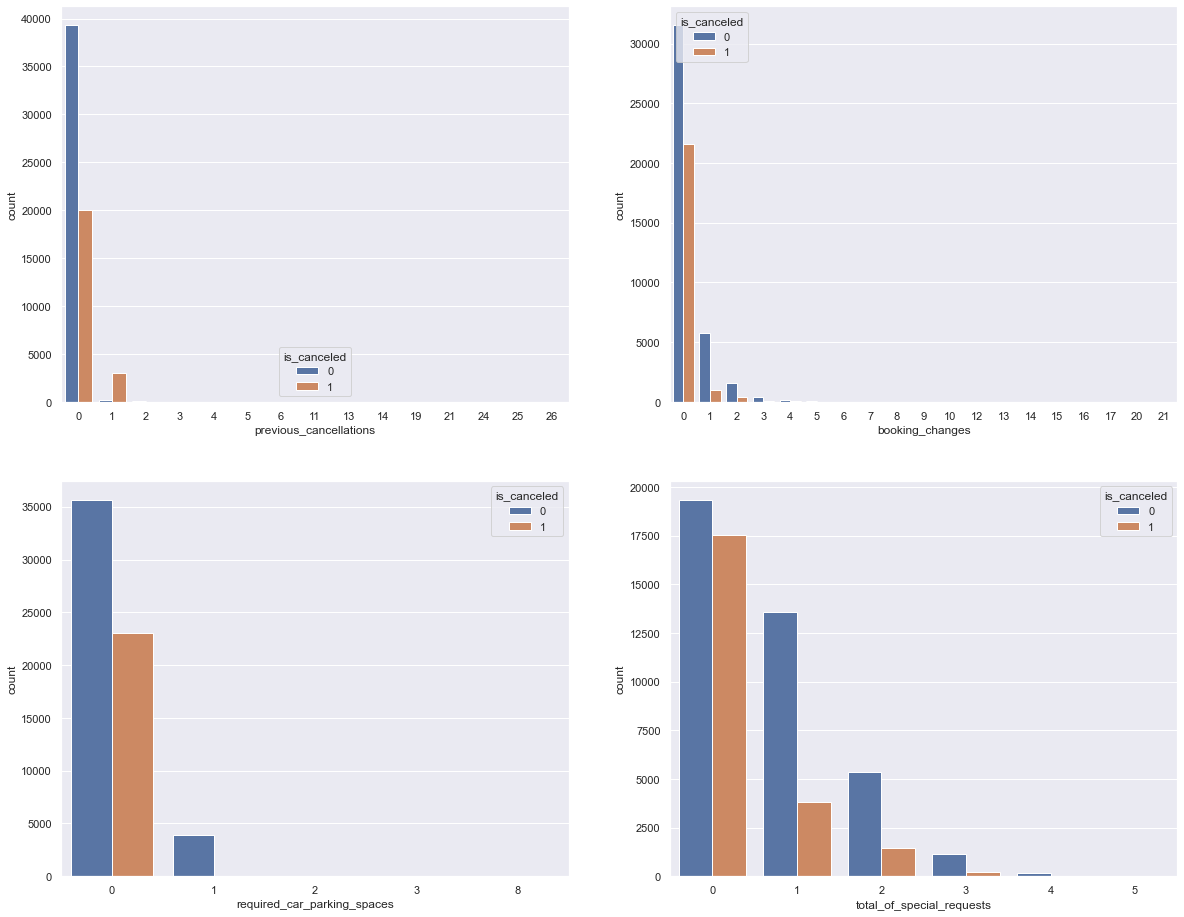

In [390]:
# Numerical EDA
numeric_var = df_hotel_train[['previous_cancellations', 'booking_changes', 'required_car_parking_spaces','total_of_special_requests']]

# create 14 empty plots
fig, ax = plt.subplots(2, 2,figsize=(20,16))

# iterate those selected variables visualised in barplot
for ix, num in enumerate(numeric_var):
    sns.countplot(x = num, hue = 'is_canceled', data = df_hotel_train, ax = ax.flatten()[ix])

In [391]:
df_hotel_train['total_of_special_requests'].value_counts(normalize =True)

0    0.588507
1    0.277860
2    0.108697
3    0.021730
4    0.002840
5    0.000367
Name: total_of_special_requests, dtype: float64

**Summary 3**

1. Customer who made the current booking are guests with no record of previous cancellations.
2. It seems that there is zero number of changes/amendments made to the booking from the moment the booking was entered on the PMS (Property Management System) until the moment of check-in or cancellation.
3. Parking spaces has no strong correlation with cancellation rate as well.
4. Around 55% of bookings do not have any special requests which brings high number of cancellation rate. Besides, around 40% of guests have one or two special request with low rate of booking cancellations. So, the higher number of special request, the lower possibility to cancel their bookings. 

In [392]:
# top 10 countries cancelled bookings
cancel_num = df_hotel_train[df_hotel_train['is_canceled'] == 1]['country'].value_counts().reset_index()
cancel_num.columns = ['country', 'cancelled guests']
cancel_num.head(10)

,country,cancelled guests
0,PRT,14326
1,GBR,1304
2,ESP,1170
3,FRA,1038
4,ITA,705
5,DEU,625
6,IRL,444
7,BRA,443
8,USA,270
9,CHN,241


In [393]:
origin_guests = df_hotel_train[df_hotel_train['is_canceled'] == 0]['country'].value_counts().reset_index()
origin_guests.columns = ['country', 'No of guests']
origin_guests.head(10)

,country,No of guests
0,PRT,11195
1,GBR,5059
2,FRA,4492
3,ESP,3280
4,DEU,3243
5,IRL,1351
6,ITA,1264
7,BEL,974
8,NLD,906
9,USA,830


In [394]:
# using Plotly.express to plot a choropleth map
import plotly.express as px

px.choropleth(origin_guests,
                    locations = "country",
                    color= "No of guests", 
                    hover_name= "country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Home country of visitors")

**Summary 4**

Portugal, UK and France, Spain and Germany are the top countries from most guests come, more than 80% come from these 5 countries. However, Portugal has also a great number of cancellation followed by UK, Spain, and so forth. 

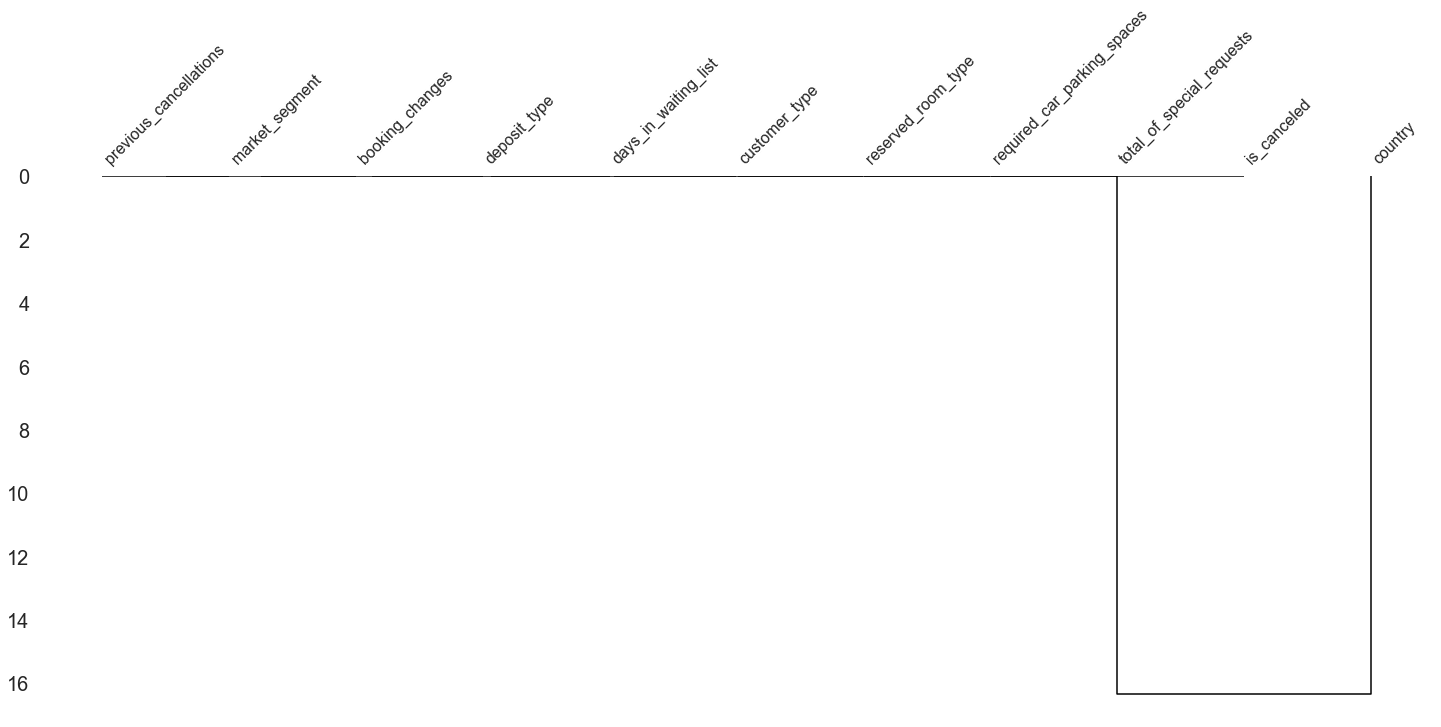

In [395]:
# dendogram
missingno.dendrogram(df_hotel_train)
plt.show()

**Conclusion**  
I am trying to split the dataset based on the top 5 that have the most significant correlation to the target `is_canceled`, which are `total_of_special_request`, `required_car_parking_spaces`, `booking_changes`, `market_segment`, `deposit_type`, and `customer_type`. However, looking at the result of dendogram, the only variables that is correlated is `total_of_special_request` and `country`. Though, to be more accurate, we can use feature selections method later. 

# 3. **DATA PREPROCESSING**


In [396]:
# splitting data
X_train = df_hotel_train.drop('is_canceled', axis = 1)
X_test = df_hotel_test.drop('is_canceled', axis = 1)
y_train = df_hotel_train['is_canceled']
y_test = df_hotel_test['is_canceled']


> ## *Data Cleaning*

- We have missing value in column `country`. However, although only `country` attribute had missing values, but we cannot be sure that there won’t be any missing values in new data after the system goes live, so it is safer to apply the imputer to all the categorical and numerical attributes by using `SimpleImputer()`.


> ## *Feature Engineering*

We will have 2 encoders and 1 scaler as explained below in details:  

1. Binary Encoder to encode all categotical variables. Most of these features have too many categories to be encoded which is why using binary encoder is the best way.  

2. Robust Scaler to scale all numerical variables. The reason I use this scaler is because these variables have extreme outliers and using robust scaler is more sensible to use.



In [397]:
df_items_info

,Column Name,Data Type,Data Count,Missing Value,Missing Value %,Number of Unique,Unique Sample
0,country,object,83573,351,0.42,162,"[SVN, PRY]"
1,market_segment,object,83573,0,0.00,8,"[Complementary, Corporate]"
2,previous_cancellations,int64,83573,0,0.00,15,"[0, 3]"
3,booking_changes,int64,83573,0,0.00,19,"[3, 7]"
4,deposit_type,object,83573,0,0.00,3,"[Non Refund, No Deposit]"
5,days_in_waiting_list,int64,83573,0,0.00,115,"[19, 42]"
6,customer_type,object,83573,0,0.00,4,"[Transient-Party, Contract]"
7,reserved_room_type,object,83573,0,0.00,10,"[B, A]"
8,required_car_parking_spaces,int64,83573,0,0.00,5,"[2, 3]"
9,total_of_special_requests,int64,83573,0,0.00,6,"[2, 1]"


In [398]:
# printing unique values of each column
for col in df_hotel_train.columns:
    print(f"{col}: \n{df_hotel_train[col].unique()}\n")

country: 
['PRT' 'ZAF' 'CHN' 'ITA' 'GBR' 'FRA' 'ISL' 'BRA' 'ESP' 'USA' 'RUS' 'LUX'
 'DEU' 'IRL' 'NOR' 'POL' nan 'NLD' 'KOR' 'SWE' 'CN' 'IRN' 'CHE' 'ISR'
 'AUT' 'BGD' 'BHR' 'ECU' 'UKR' 'BEL' 'AGO' 'TUR' 'SRB' 'ROU' 'AUS' 'FIN'
 'DNK' 'MAR' 'BWA' 'GEO' 'SAU' 'PRI' 'QAT' 'LTU' 'IRQ' 'CZE' 'BGR' 'JOR'
 'DZA' 'BLR' 'TWN' 'MEX' 'NGA' 'COM' 'HUN' 'CHL' 'MAC' 'OMN' 'MKD' 'COL'
 'IND' 'PER' 'EST' 'JPN' 'ARG' 'LVA' 'AND' 'CYP' 'MYS' 'GRC' 'MLT' 'CPV'
 'GIB' 'SVK' 'HKG' 'PAK' 'URY' 'MOZ' 'FRO' 'MDV' 'LBN' 'ARM' 'HRV' 'VEN'
 'NZL' 'NCL' 'THA' 'IDN' 'GNB' 'SVN' 'TUN' 'UZB' 'ARE' 'SGP' 'GGY' 'BDI'
 'ETH' 'ALB' 'GHA' 'KWT' 'LBY' 'SLE' 'KAZ' 'TJK' 'GAB' 'CRI' 'ZMB' 'PAN'
 'AZE' 'JEY' 'PHL' 'AIA' 'SUR' 'JAM' 'MUS' 'KNA' 'PRY' 'UMI' 'DOM' 'BFA'
 'CYM' 'BEN' 'TMP' 'MWI' 'TGO' 'CUB' 'BRB' 'MNE' 'BIH' 'ZWE' 'EGY' 'CIV'
 'UGA' 'SEN' 'CAF' 'LKA' 'NIC' 'LIE' 'BOL' 'KEN' 'CMR' 'DMA' 'MLI' 'SLV'
 'PLW' 'RWA' 'IMN' 'ABW' 'MMR' 'SDN' 'VNM' 'KHM' 'LAO' 'GTM' 'SYR' 'ATA'
 'GLP' 'TZA']

market_segment: 
['Online TA'

In [422]:
# firstly, we need to create list to indicate which features will be imputed and which method
features_numeric = ['previous_cancellations', 'booking_changes', 
        'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests']

features_categoric = ['country', 'market_segment', 
        'deposit_type', 'customer_type', 'reserved_room_type']

In [401]:
# without scaling and encoding

# to impute numerical features
numeric_imputer = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median'))
])

# to impute categorical features
categoric_imputer = Pipeline([
    ('imputer', SimpleImputer(strategy = 'constant', fill_value = 'Missing')),
])

# then we put the features list and the transformers together
# using the column transformer

preprocessor_imputer = ColumnTransformer([
        ('num', numeric_imputer, features_numeric),
        ('ctg', categoric_imputer, features_categoric)                                           
], remainder = 'passthrough')

X_train_prep_imp = preprocessor_imputer.fit_transform(X_train)
X_test_prep_imp = preprocessor_imputer.transform(X_test)

X_train_prep_imp = pd.DataFrame(X_train_prep_imp)
X_test_prep_imp = pd.DataFrame(X_test_prep_imp)

In [451]:
# with encoding

# firstly, we need to create list to indicate which features will be imputed and which method
features_ctg_binary = ['country', 'reserved_room_type', 'market_segment']

features_ctg_onehot = ['deposit_type', 'customer_type']

# then initiate the imputers with pipeline for each features list

# to impute numerical features
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median'))
])

# to impute categorical features with many categories
binary_encoder = Pipeline([
    ('imputer', SimpleImputer(strategy = 'constant', fill_value = 'Missing')),
    ('binary', ce.BinaryEncoder())
])

# to impute categorical features with many categories
onehot_encoder = Pipeline([
    ('imputer', SimpleImputer(strategy = 'constant', fill_value = 'Missing')),
    ('onehot', OneHotEncoder(drop = 'first'))
])

# then we put the features list and the transformers together
# using the column transformer

preprocessor= ColumnTransformer([
        ('num', numeric_transformer, features_numeric),
        ('binary', binary_encoder, features_ctg_binary),
        ('onehot', onehot_encoder, features_ctg_onehot)                                         
], remainder = 'passthrough')

# data transformation 

X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep = preprocessor.transform(X_test)

X_train_prep= pd.DataFrame(X_train_prep)
X_test_prep = pd.DataFrame(X_test_prep)

In [452]:
X_test_prep

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20889,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
20890,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
20891,1.0,0.0,44.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
20892,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [424]:
#create function to get feature names from column transformer
def get_feature_names(column_transformer):
    """Get feature names from all transformers.
    Returns
    -------
    feature_names : list of strings
        Names of the features produced by transform.
    """
    # Remove the internal helper function
    #check_is_fitted(column_transformer)
    
    # Turn loopkup into function for better handling with pipeline later
    def get_names(trans):
        # >> Original get_feature_names() method
        if trans == 'drop' or (
                hasattr(column, '__len__') and not len(column)):
            return []
        if trans == 'passthrough':
            if hasattr(column_transformer, '_df_columns'):
                if ((not isinstance(column, slice))
                        and all(isinstance(col, str) for col in column)):
                    return column
                else:
                    return column_transformer._df_columns[column]
            else:
                indices = np.arange(column_transformer._n_features)
                return ['x%d' % i for i in indices[column]]
        if not hasattr(trans, 'get_feature_names'):
        # >>> Change: Return input column names if no method avaiable
            # Turn error into a warning
            warnings.warn("Transformer %s (type %s) does not "
                                 "provide get_feature_names. "
                                 "Will return input column names if available"
                                 % (str(name), type(trans).__name__))
            # For transformers without a get_features_names method, use the input
            # names to the column transformer
            if column is None:
                return []
            else:
                return [name + "__" + f for f in column]

        return [name + "__" + f for f in trans.get_feature_names()]
    
    ### Start of processing
    feature_names = []
    
    # Allow transformers to be pipelines. Pipeline steps are named differently, so preprocessing is needed
    if type(column_transformer) == sklearn.pipeline.Pipeline:
        l_transformers = [(name, trans, None, None) for step, name, trans in column_transformer._iter()]
    else:
        # For column transformers, follow the original method
        l_transformers = list(column_transformer._iter(fitted=True))
    
    
    for name, trans, column, _ in l_transformers: 
        if type(trans) == sklearn.pipeline.Pipeline:
            # Recursive call on pipeline
            _names = get_feature_names(trans)
            # if pipeline has no transformer that returns names
            if len(_names)==0:
                _names = [name + "__" + f for f in column]
            feature_names.extend(_names)
        else:
            feature_names.extend(get_names(trans))
    
    return feature_names

In [425]:
feature_imp = get_feature_names(preprocessor_imputer)
feature_imp

['num__previous_cancellations',
 'num__booking_changes',
 'num__days_in_waiting_list',
 'num__required_car_parking_spaces',
 'num__total_of_special_requests',
 'ctg__country',
 'ctg__market_segment',
 'ctg__deposit_type',
 'ctg__customer_type',
 'ctg__reserved_room_type']

In [453]:
feature_prep= get_feature_names(preprocessor)
feature_prep

['num__previous_cancellations',
 'num__booking_changes',
 'num__days_in_waiting_list',
 'num__required_car_parking_spaces',
 'num__total_of_special_requests',
 'binary__0_0',
 'binary__0_1',
 'binary__0_2',
 'binary__0_3',
 'binary__0_4',
 'binary__0_5',
 'binary__0_6',
 'binary__0_7',
 'binary__1_0',
 'binary__1_1',
 'binary__1_2',
 'binary__1_3',
 'binary__2_0',
 'binary__2_1',
 'binary__2_2',
 'binary__2_3',
 'onehot__x0_Non Refund',
 'onehot__x0_Refundable',
 'onehot__x1_Group',
 'onehot__x1_Transient',
 'onehot__x1_Transient-Party']

In [428]:
# rename column preprocessed imputed
X_train_imp_array = np.array(X_train_prep_imp)
X_test_imp_array = np.array(X_test_prep_imp)

X_train_prep_imp = pd.DataFrame(
    data = X_train_imp_array,
    columns = feature_imp
)
X_test_prep_imp = pd.DataFrame(
    data = X_test_imp_array,
    columns = feature_imp
)

X_train_prep_imp = pd.concat([X_train_prep_imp], axis=1)
X_test_prep_imp = pd.concat([X_test_prep_imp], axis=1)

In [454]:
# rename column preprocessed imputed
X_train_prep_array = np.array(X_train_prep)
X_test_prep_array = np.array(X_test_prep)

X_train_prep= pd.DataFrame(
    data= X_train_prep_array,
    columns= feature_prep
)
X_test_prep = pd.DataFrame(
    data = X_test_prep_array,
    columns = feature_prep
)

X_train_prep = pd.concat([X_train_prep], axis=1)
X_test_prep = pd.concat([X_test_prep], axis=1)

In [455]:
X_train_prep

,num__previous_cancellations,num__booking_changes,num__days_in_waiting_list,num__required_car_parking_spaces,num__total_of_special_requests,binary__0_0,binary__0_1,binary__0_2,binary__0_3,binary__0_4,...,binary__1_3,binary__2_0,binary__2_1,binary__2_2,binary__2_3,onehot__x0_Non Refund,onehot__x0_Refundable,onehot__x1_Group,onehot__x1_Transient,onehot__x1_Transient-Party
0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62674,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
62675,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
62676,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
62677,5.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [456]:
X_train_prep.isna().sum()

num__previous_cancellations         0
num__booking_changes                0
num__days_in_waiting_list           0
num__required_car_parking_spaces    0
num__total_of_special_requests      0
binary__0_0                         0
binary__0_1                         0
binary__0_2                         0
binary__0_3                         0
binary__0_4                         0
binary__0_5                         0
binary__0_6                         0
binary__0_7                         0
binary__1_0                         0
binary__1_1                         0
binary__1_2                         0
binary__1_3                         0
binary__2_0                         0
binary__2_1                         0
binary__2_2                         0
binary__2_3                         0
onehot__x0_Non Refund               0
onehot__x0_Refundable               0
onehot__x1_Group                    0
onehot__x1_Transient                0
onehot__x1_Transient-Party          0
dtype: int64

> ## *Feature Selection*


### **Univariate Feature Selection**

In [457]:
num_scaled = np.array(X_train_prep.columns)[:5]
ctg_encoded = np.array(X_train_prep.columns)[5:]

In [458]:
# Univariate
num_selector = SelectKBest(score_func = f_classif, k = 3)
ctg_selector = SelectKBest(score_func = mutual_info_classif, k=15)

X_train_num_univa = num_selector.fit_transform(X_train_prep[num_scaled], y_train)
X_test_num_univa = num_selector.transform(X_test_prep[num_scaled])

X_train_ctg_univa = ctg_selector.fit_transform(X_train_prep[ctg_encoded], y_train)
X_test_ctg_univa = ctg_selector.transform(X_test_prep[ctg_encoded])

selected_cols = (num_scaled[num_selector.get_support().tolist()].tolist() 
                 + ctg_encoded[ctg_selector.get_support().tolist()].tolist())

X_train_selected_univa = np.concatenate([X_train_num_univa, X_train_ctg_univa], axis=1)
X_test_selected_univa = np.concatenate([X_test_num_univa, X_test_ctg_univa], axis=1)

X_train_selected_univa = pd.DataFrame( data=X_train_selected_univa, columns=selected_cols)
X_test_selected_univa = pd.DataFrame( data=X_test_selected_univa, columns=selected_cols)

In [459]:
X_train_selected_univa

,num__booking_changes,num__required_car_parking_spaces,num__total_of_special_requests,binary__0_3,binary__0_4,binary__0_5,binary__0_6,binary__0_7,binary__1_1,binary__1_2,binary__1_3,binary__2_0,binary__2_1,binary__2_2,binary__2_3,onehot__x0_Non Refund,onehot__x1_Transient,onehot__x1_Transient-Party
0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62674,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
62675,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
62676,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0
62677,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0


In [460]:
log_reg = LogisticRegression(random_state=89, penalty='none', max_iter=1000)
log_reg.fit(X_train_selected_univa, y_train)
log_reg.score(X_train_selected_univa, y_train)

0.7657110036854449

In [461]:
log_reg.score(X_test_selected_univa, y_test)

0.7671101751699052

### **SelectFrom Model**

In [462]:
# model_based
# approach 1: without SelectFromModel
log_reg = LogisticRegression(random_state=89, penalty='none', max_iter=1000)
log_reg.fit(X_train_prep, y_train)


LogisticRegression(max_iter=1000, penalty='none', random_state=89)

In [463]:
log_reg.score(X_train_prep, y_train)

0.7805644633768886

<AxesSubplot:xlabel='coef', ylabel='col_name'>

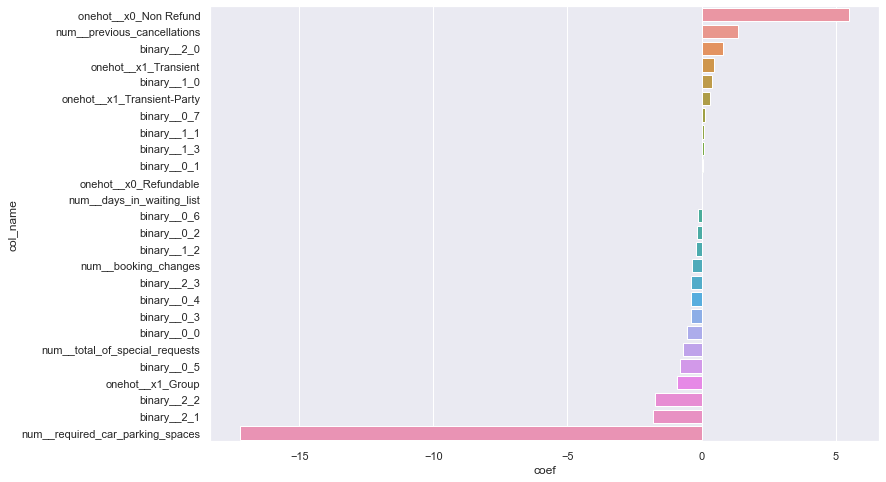

In [464]:
df_coef = pd.DataFrame({
    'col_name': X_train_prep.columns,
    'coef': (log_reg.coef_[0, :]),
})
plt.figure(figsize=(12,8))
sns.barplot(x='coef', y='col_name', data=df_coef.sort_values(by='coef', ascending=False))

In [466]:
# approach 2: SelectFromModel
log_reg_selector = SelectFromModel(
    LogisticRegression(random_state=89, penalty='none', max_iter=1000),
    max_features=20
)

dt_selector = SelectFromModel(
    DecisionTreeClassifier(random_state=89),
    max_features=15
)

X_train_selected_logreg = log_reg_selector.fit_transform(X_train_prep, y_train)
X_test_selected_logreg = log_reg_selector.transform(X_test_prep)

X_train_selected_dt = dt_selector.fit_transform(X_train_prep, y_train)
X_test_selected_dt = dt_selector.transform(X_test_prep)

In [467]:
log_reg_selector.get_feature_names_out()

array(['num__previous_cancellations', 'num__required_car_parking_spaces',
       'binary__2_1', 'binary__2_2', 'onehot__x0_Non Refund'],
      dtype=object)

In [468]:
dt_selector.get_feature_names_out()

array(['num__previous_cancellations', 'num__required_car_parking_spaces',
       'num__total_of_special_requests', 'binary__0_5', 'binary__2_1',
       'binary__2_2', 'onehot__x0_Non Refund', 'onehot__x1_Transient'],
      dtype=object)

### **Iterative Feature Selection (RFE)**

In [469]:
# iterative feature selection (RFE)
rfe_selector = RFE(
    LogisticRegression(random_state=89, penalty='none', max_iter=1000),
    n_features_to_select=20)

X_train_selected_rfe = rfe_selector.fit_transform(X_train_prep, y_train)
X_test_selected_rfe = rfe_selector.transform(X_test_prep)

In [470]:
rfe_selector.get_feature_names_out()

array(['num__previous_cancellations', 'num__booking_changes',
       'num__required_car_parking_spaces',
       'num__total_of_special_requests', 'binary__0_0', 'binary__0_2',
       'binary__0_3', 'binary__0_4', 'binary__0_5', 'binary__0_6',
       'binary__1_0', 'binary__1_2', 'binary__2_0', 'binary__2_1',
       'binary__2_2', 'binary__2_3', 'onehot__x0_Non Refund',
       'onehot__x1_Group', 'onehot__x1_Transient',
       'onehot__x1_Transient-Party'], dtype=object)

# 4. **MODEL TRAINING**

For feature selection, we choose RFE method as it gives higher score than other approaches.

In [471]:
log_reg = LogisticRegression(random_state=89, penalty='none', max_iter=1000)

for X_features in [X_train_selected_univa, X_train_selected_logreg, X_train_selected_rfe]:
    log_reg.fit(X_features, y_train)
    print(log_reg.score(X_features, y_train))

0.7657110036854449
0.7660460441296127
0.7836276902949951


In [472]:
dt = DecisionTreeClassifier(max_depth=5, random_state=89)
dt.fit(X_train_prep, y_train)
dt.score(X_test_prep, y_test)

0.7829520436488944

In [473]:
dt.score(X_train_prep, y_train)

0.7833086041576923

**Summary**  

After we tried several methods of feature selections, the highest score is RFE method. Therefore, we will use this X_train_selected_rfe afterward. 

# 5. **MODEL SELECTION**

> ## *Logistic Regression*

In [474]:
log_reg = LogisticRegression()
log_reg.fit(X_train_selected_rfe, y_train)

logreg_y_pred = log_reg.predict(X_test_selected_rfe)

accuracy_logreg = accuracy_score(y_test, logreg_y_pred)
conf_logreg = confusion_matrix(y_test, logreg_y_pred)
classif_report_logreg = classification_report(y_test, logreg_y_pred)

print(f"Accuracy Score of Logistic Regression is: {accuracy_logreg}")
print(f"Confusion Matrix of Logistic Regression is: \n{conf_logreg}")
print(f"Classification Report of Logistic Regression is: \n{classif_report_logreg}")

Accuracy Score of Logistic Regression is: 0.7844357231741169
Confusion Matrix of Logistic Regression is: 
[[11927  1272]
 [ 3232  4463]]
Classification Report of Logistic Regression is: 
              precision    recall  f1-score   support

           0       0.79      0.90      0.84     13199
           1       0.78      0.58      0.66      7695

    accuracy                           0.78     20894
   macro avg       0.78      0.74      0.75     20894
weighted avg       0.78      0.78      0.78     20894



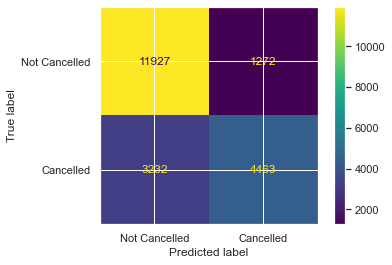

In [475]:
ConfusionMatrixDisplay(conf_logreg, display_labels=np.array(['Not Cancelled', 'Cancelled'])).plot();

In [476]:
cross_val_score(
    log_reg,
    X_train_selected_rfe, y_train,
    scoring='accuracy',
    cv=5
)

array([0.78310466, 0.78661455, 0.78342374, 0.78150925, 0.78284803])

In [477]:
y_train_proba = log_reg.predict_proba(X_train_selected_rfe)
pr_curve_raw = precision_recall_curve(y_train, y_train_proba[:, 1])

In [478]:
pr_curve_raw[2]

array([1.13610590e-22, 2.29225423e-22, 4.54695345e-09, ...,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00])

In [479]:
df_pr_curve = pd.DataFrame({
    'precision': pr_curve_raw[0][:-1],
    'recall': pr_curve_raw[1][:-1],
    'threshold': pr_curve_raw[2],
})

used_threshold = df_pr_curve[df_pr_curve['precision'] >= 0.8].iloc[0]['threshold']

In [480]:
y_train_proba[:, 1]

array([0.25177462, 0.10729962, 0.47897416, ..., 0.99710912, 0.87065759,
       0.42888177])

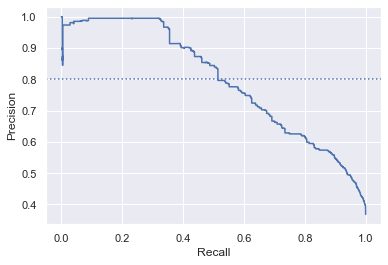

In [481]:
PrecisionRecallDisplay(pr_curve_raw[0], pr_curve_raw[1]).plot()
plt.axhline(0.8, ls=':');

In [482]:
roc_curve_raw = roc_curve(y_train, y_train_proba[:, 1])
df_roc_curve = pd.DataFrame({
    'fpr': roc_curve_raw[0],
    'tpr': roc_curve_raw[1],
    'threshold': roc_curve_raw[2],
})
df_roc_curve

,fpr,tpr,threshold
0,0.000000,0.000000,2.000000e+00
1,0.000000,0.001690,1.000000e+00
2,0.000000,0.002209,1.000000e+00
3,0.000000,0.002686,1.000000e+00
4,0.000000,0.002729,1.000000e+00
...,...,...,...
3455,0.998939,1.000000,4.097763e-05
3456,0.998990,1.000000,4.035255e-05
3457,0.999116,1.000000,2.901115e-05
3458,0.999167,1.000000,2.885850e-05


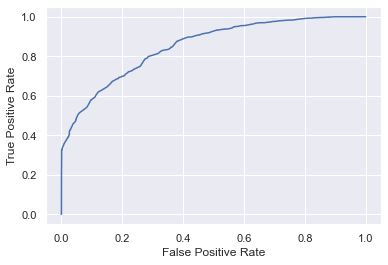

In [483]:
RocCurveDisplay(fpr=roc_curve_raw[0], tpr=roc_curve_raw[1]).plot()

In [484]:
roc_auc_score(y_train, y_train_proba[:, 1])

0.850405059563227

**Summary**  

The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes. ROC AUC of logistic regression is arounf 85% which means this model has good performance to distinguish between the positive and negative classes.

> ## *Decision Tree*

In [507]:
dt = DecisionTreeClassifier(random_state=89)
dt.fit(X_train_selected_rfe, y_train)

y_pred_dt = dt.predict(X_train_selected_rfe)

acc_dt = accuracy_score(y_train, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_train, y_pred_dt)
classif_report_dt = classification_report(y_train, y_pred_dt)

print(f"Accuracy Score of Decision Tree is : {acc_dt}")
print(f"Confusion Matrix : \n{conf_matrix_dt}")
print(f"Classification Report : \n{classif_report_dt}")

print(f"Classification Report : \n", classification_report(y_test, y_pred_dt))

Accuracy Score of Decision Tree is : 0.8170200545637295
Confusion Matrix : 
[[34709  4887]
 [ 6582 16501]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.84      0.88      0.86     39596
           1       0.77      0.71      0.74     23083

    accuracy                           0.82     62679
   macro avg       0.81      0.80      0.80     62679
weighted avg       0.82      0.82      0.82     62679



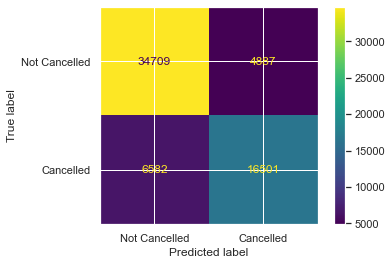

In [490]:
ConfusionMatrixDisplay(conf_matrix_dt, display_labels=np.array(['Not Cancelled', 'Cancelled'])).plot();

In [491]:
cross_val_score(
    dt,
    X_train_selected_rfe, y_train,
    scoring='accuracy',
    cv=5
)

array([0.80783344, 0.80799298, 0.80512125, 0.80216975, 0.8095732 ])

In [243]:
# plt.figure(figsize=(10,7))
# plot_tree(dt, feature_names = list(X_train_selected_rfe), class_names = ['Not Cancelled','Cancelled'], filled = True)
# plt.show()

**Summary**  
From the confusion matrix, algorithm of Decision Tree misclassified about 11,469 data that gives 82.0 % accuracy. As negative and positive classes is equally important to us, the f1 score for both classes is relatively good. The Cross Validation score is slightly the same with the train set score which is at roughly 81%. 

> ## *Voting*

In [508]:
# voting
base_learners = [
    ('log_reg', LogisticRegression(random_state=89, max_iter=1000)),
    ('dt', DecisionTreeClassifier(random_state=89))
]
voting_classifer = VotingClassifier(estimators=base_learners, voting='soft')
voting_classifer.fit(X_train_selected_rfe, y_train)

VotingClassifier(estimators=[('log_reg',
                              LogisticRegression(max_iter=1000,
                                                 random_state=89)),
                             ('dt', DecisionTreeClassifier(random_state=89))],
                 voting='soft')

(array([10645., 11186., 10898.,  7809.,  4899.,  5030.,  3761.,   628.,
          164.,  7659.]),
 array([1.1361059e-22, 1.0000000e-01, 2.0000000e-01, 3.0000000e-01,
        4.0000000e-01, 5.0000000e-01, 6.0000000e-01, 7.0000000e-01,
        8.0000000e-01, 9.0000000e-01, 1.0000000e+00]),
 <BarContainer object of 10 artists>)

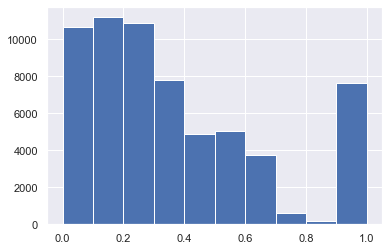

In [509]:
plt.hist(log_reg.predict_proba(X_train_selected_rfe)[:, 1])

In [510]:
for estimator_ in [log_reg, dt, voting_classifer]:
    print(estimator_.__class__.__name__, estimator_.score(X_train_selected_rfe, y_train))

LogisticRegression 0.7835798273743997
DecisionTreeClassifier 0.8170200545637295
VotingClassifier 0.8070007498524226


In [511]:
for estimator_ in [log_reg, dt, voting_classifer]:
    print(estimator_.__class__.__name__)
    y_train_pred = estimator_.predict(X_train_selected_rfe)
    print('Classif Report\n', classification_report(y_train, y_train_pred))
    print('==============')

LogisticRegression
Classif Report
               precision    recall  f1-score   support

           0       0.79      0.90      0.84     39596
           1       0.78      0.58      0.66     23083

    accuracy                           0.78     62679
   macro avg       0.78      0.74      0.75     62679
weighted avg       0.78      0.78      0.78     62679

DecisionTreeClassifier
Classif Report
               precision    recall  f1-score   support

           0       0.84      0.88      0.86     39596
           1       0.77      0.71      0.74     23083

    accuracy                           0.82     62679
   macro avg       0.81      0.80      0.80     62679
weighted avg       0.82      0.82      0.82     62679

VotingClassifier
Classif Report
               precision    recall  f1-score   support

           0       0.80      0.92      0.86     39596
           1       0.82      0.61      0.70     23083

    accuracy                           0.81     62679
   macro avg       0.

In [512]:
log_reg.predict(X_train_selected_rfe)[:30]

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0])

In [513]:
dt.predict(X_train_selected_rfe)[:30]

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1])

In [514]:
voting_classifer.predict(X_train_selected_rfe)[:30]

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0])

**Summary**  

The best model if we compared between Logistic Regression, Decision Tree, Voting Classifier is `Decision Tree Classifier` which has accuracy score at 82% with good f1-score. Therefore, we still stick with Decision Tree model until we tried the next approaches such as Stacking, Bagging, and Boosting. 

> ## *Stacking*

In [515]:
# stacking
stacking_classifier = StackingClassifier(
    estimators=base_learners,
    final_estimator=LogisticRegression(random_state=89, max_iter=1000)
)

stacking_classifier.fit(X_train_selected_rfe, y_train)
y_train_pred = stacking_classifier.predict(X_train_selected_rfe)
print('Classif Report \n', classification_report(y_train, y_train_pred))

Classif Report 
               precision    recall  f1-score   support

           0       0.83      0.89      0.86     39596
           1       0.79      0.68      0.73     23083

    accuracy                           0.81     62679
   macro avg       0.81      0.79      0.79     62679
weighted avg       0.81      0.81      0.81     62679



In [516]:
# stacking
stacking_classifier = StackingClassifier(
    estimators=base_learners,
    final_estimator=DecisionTreeClassifier(random_state=89)
)

stacking_classifier.fit(X_train_selected_rfe, y_train)
y_train_pred = stacking_classifier.predict(X_train_selected_rfe)
print('Classif Report \n', classification_report(y_train, y_train_pred))

Classif Report 
               precision    recall  f1-score   support

           0       0.82      0.86      0.84     39596
           1       0.74      0.69      0.71     23083

    accuracy                           0.79     62679
   macro avg       0.78      0.77      0.78     62679
weighted avg       0.79      0.79      0.79     62679



**Summary**  

Stacking with final_estimator of Logistic Regression is higher than with final_estimator of Decision Tree. Yet, Decision Tree still has the highest score of accuracy. Therefore, we still stick with Decision Tree model. 

> ## *Bagging*

In [517]:
# bagging
bagging_classifier = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=500, random_state=89, n_jobs=-1
)
bagging_classifier.fit(X_train_selected_rfe, y_train)
y_train_pred = bagging_classifier.predict(X_train_selected_rfe)
y_test_pred = bagging_classifier.predict(X_test_selected_rfe)
print('Train set')
print('Classif Report \n', classification_report(y_train, y_train_pred))

print('Test set')
print('Classif Report \n', classification_report(y_test, y_test_pred))

Train set
Classif Report 
               precision    recall  f1-score   support

           0       0.84      0.87      0.86     39596
           1       0.77      0.72      0.74     23083

    accuracy                           0.82     62679
   macro avg       0.81      0.80      0.80     62679
weighted avg       0.82      0.82      0.82     62679

Test set
Classif Report 
               precision    recall  f1-score   support

           0       0.83      0.86      0.85     13199
           1       0.75      0.70      0.73      7695

    accuracy                           0.80     20894
   macro avg       0.79      0.78      0.79     20894
weighted avg       0.80      0.80      0.80     20894



> ## *Random Forest*

In [505]:
rf = RandomForestClassifier(
    n_estimators=100, random_state=89, n_jobs=-1, max_depth=7,
    max_features='sqrt', class_weight='balanced'
)
rf.fit(X_train_selected_rfe, y_train)
y_train_pred = rf.predict(X_train_selected_rfe)
y_test_pred = rf.predict(X_test_selected_rfe)
print('Train set')
print(classification_report(y_train, y_train_pred))
print('=================================================')
print('Test set')
print(classification_report(y_test, y_test_pred))


Train set
              precision    recall  f1-score   support

           0       0.83      0.86      0.85     39596
           1       0.75      0.71      0.73     23083

    accuracy                           0.81     62679
   macro avg       0.79      0.78      0.79     62679
weighted avg       0.80      0.81      0.80     62679

Test set
              precision    recall  f1-score   support

           0       0.83      0.86      0.84     13199
           1       0.74      0.70      0.72      7695

    accuracy                           0.80     20894
   macro avg       0.79      0.78      0.78     20894
weighted avg       0.80      0.80      0.80     20894



In [520]:
cross_val_score(
    rf,
    X_train_selected_rfe, y_train,
    scoring='accuracy',
    cv=5
)

array([0.8047224 , 0.80719528, 0.80017549, 0.80169113, 0.80398883])

> ## *Boosting*

In [525]:
# AdaBoost

ada = AdaBoostClassifier(base_estimator = dt, n_estimators=10)
ada.fit(X_train_selected_rfe, y_train)

y_pred_ada = ada.predict(X_train_selected_rfe)

acc_ada = accuracy_score(y_train, y_pred_ada)
conf = confusion_matrix(y_train, y_pred_ada)
clf_report = classification_report(y_train, y_pred_ada)

print(f"Accuracy Score of Ada Boost Classifier is : {acc_ada}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Ada Boost Classifier is : 0.8170200545637295
Confusion Matrix : 
[[34690  4906]
 [ 6563 16520]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.84      0.88      0.86     39596
           1       0.77      0.72      0.74     23083

    accuracy                           0.82     62679
   macro avg       0.81      0.80      0.80     62679
weighted avg       0.82      0.82      0.82     62679



In [526]:
cross_val_score(
    ada,
    X_train_selected_rfe, y_train,
    scoring='accuracy',
    cv=5
)

array([0.80775367, 0.80655712, 0.80559987, 0.80145182, 0.80933387])

**Summary**  

Ada boost has similar performance with Decision Tree at 82% Accuracy score and good f1-score too. Followed by Random Forest. Let's compare these three performance into one table by their f1-score in the next step.

# 6. **MODEL PERFORMANCE**

In [537]:
# Model Performance

# Define models
log_reg = LogisticRegression(random_state=89)
dt = DecisionTreeClassifier(random_state=89)
rf = RandomForestClassifier(random_state=89)
ab = AdaBoostClassifier(random_state=89)

# Define imbalance treatment methods
models = [log_reg, dt, rf, ab]
score = []
mean_score = []
std_score = []

for i in models:
    
    skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=89)

    estimator = Pipeline([
        ('preprocessing', preprocessor),
        ('feature selection', rfe_selector),
        ('model', i)
    ])

    model_cv = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=skfold, 
        scoring='f1', 
        error_score='raise'
        )

    print(model_cv, i)


    score.append(model_cv)
    mean_score.append(model_cv.mean())
    std_score.append(model_cv.std())

[0.64960928 0.66986116 0.65231079 0.66257207 0.65647324] LogisticRegression(random_state=89)
[0.70134149 0.72666068 0.72413793 0.72597208 0.7270258 ] DecisionTreeClassifier(random_state=89)
[0.70360371 0.72678331 0.72434743 0.72681126 0.72860691] RandomForestClassifier(random_state=89)
[0.64665006 0.67698306 0.66531543 0.6539267  0.67442449] AdaBoostClassifier(random_state=89)


In [538]:
pd.DataFrame({
    'model':['log_reg', 'dt', 'rf', 'ab'],
    'mean':mean_score,
    'std':std_score
})

,model,mean,std
0,log_reg,0.658165,0.007301
1,dt,0.721028,0.009893
2,rf,0.722031,0.009312
3,ab,0.663460,0.011662


**Notes**

From the results of the cross validation above, it can be seen that the random forest model has the best and most stable performance when we check from the average F1-score and standard deviation. As for decision tree, the result are only slightly different, but random forest is slightly better.

# 6. **MODEL PERFORMANCE ON TEST SET**

In [539]:
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=89),
    'Random Forest': RandomForestClassifier(random_state=89),  
}

score=[]

for i in models:
    
    model = Pipeline([
        ('preprocessing', preprocessor),
        ('feature selection', rfe_selector),
        ('model', models[i])
    ])

    # fitting
    model.fit(X_train, y_train)

    # predict
    y_pred = model.predict(X_test)

    # f1 score
    score.append([f1_score(y_test, y_pred)])

# tapilkan dalam dataframe
score_before_tuning = pd.DataFrame(score, columns=['F1 score'], index = models.keys())
score_before_tuning


,F1 score
Decision Tree,0.724228
Random Forest,0.725784


**Summary**  

Random forest has slightly higher than the decision tree. Therefore, we choose this model to generate booking cancellation prediction. Next, we need to do the following step: Hyperparameter Tuning

# **6. HYPERPARAMETER TUNING**

**Hyperparameter Tuning for Random Forest:**

- Adding n_estimator ---> more averaging ---> decrease overfit
- Adding max_fetures ---> prone to best decision ---> overfit prone
- Adding max_depth ---> more decision ---> overfit prone
- Adding min_samples_leaf ---> prevent split ---> decrease overfit
- Adding min_samples_split ---> prevent split ---> decrease overfit


In [542]:
# Number of trees in random forest
n_estimators = list(np.arange(100, 2000, 1))

# Number of features to consider at every split
max_features = list(np.arange(2, 9, 1))

# Maximum number of levels in tree
max_depth = list(np.arange(20, 101, 1))

# Minimum number of samples required to split a node
min_samples_split = list(np.arange(2, 21, 1))

# Minimum number of samples required at each leaf node
min_samples_leaf = list(np.arange(1, 21, 1))


hyperparam_space_rf = {
    'model__n_estimators': n_estimators,
    'model__max_features': max_features,
    'model__max_depth': max_depth,
    'model__min_samples_split': min_samples_split,
    'model__min_samples_leaf': min_samples_leaf,
}


In [553]:
# Random Forest

rf = RandomForestClassifier(random_state=89)

rf_pipe = Pipeline([
    ('preprocessing', preprocessor),
    ('feature selection', rfe_selector),
    ('model', rf)
])

random_rf = RandomizedSearchCV(
    rf_pipe, 
    param_distributions = hyperparam_space_rf,
    cv = skfold,
    scoring= 'f1',
    n_jobs= -1, 
    random_state=0,
    n_iter=20

)

In [554]:
random_rf.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=89, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median'))]),
                                                                               ['previous_cancellations',
                                                                                'booking_changes',
                                                                                'days_in_waiting_list',
                                                                                'required_car_parking_spaces',
                                                                                'tota...
                                        'model__max_features': [2, 3, 4, 5, 6,
                                                                7, 8],
                                        'model__min_samples_leaf': [1, 2, 3, 4,
                                                                    5, 6, 7, 8,
                                                                    9, 10, 11,
                                                                    12, 13, 14,
                                                                    15, 16, 17,
                                                                    18, 19,
                                                                    20],
                                        'model__min_samples_split': [2, 3, 4, 5,
                                                                     6, 7, 8, 9,
                                                                     10, 11, 12,
                                                                     13, 14, 15,
                                                                     16, 17, 18,
                                                                     19, 20],
                                        'model__n_estimators': [100, 101, 102,
                                                                103, 104, 105,
                                                                106, 107, 108,
                                                                109, 110, 111,
                                                                112, 113, 114,
                                                                115, 116, 117,
                                                                118, 119, 120,
                                                                121, 122, 123,
                                                                124, 125, 126,
                                                                127, 128, 129, ...]},
                   random_state=0, scoring='f1')

In [555]:
pd.DataFrame(random_rf.cv_results_).sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_estimators,param_model__min_samples_split,param_model__min_samples_leaf,param_model__max_features,param_model__max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
6,57.128610,1.522581,2.517371,0.034136,741,18,6,7,37,"{'model__n_estimators': 741, 'model__min_sampl...",0.715141,0.722391,0.726302,0.733864,0.723100,0.724160,0.006072,1
1,22.860017,0.435887,1.146866,0.091302,291,4,7,8,98,"{'model__n_estimators': 291, 'model__min_sampl...",0.713772,0.722591,0.726387,0.734040,0.723638,0.724086,0.006530,2
7,71.483386,0.438790,3.071605,0.115797,930,5,17,8,27,"{'model__n_estimators': 930, 'model__min_sampl...",0.712931,0.720346,0.727627,0.728111,0.719568,0.721716,0.005648,3
2,110.338769,0.635123,5.928494,0.462705,1773,5,11,6,96,"{'model__n_estimators': 1773, 'model__min_samp...",0.712414,0.719625,0.727940,0.725718,0.719774,0.721095,0.005431,4
18,57.148240,0.376535,2.588712,0.069156,776,12,16,7,77,"{'model__n_estimators': 776, 'model__min_sampl...",0.711881,0.720487,0.725560,0.727337,0.717750,0.720603,0.005553,5
16,143.386498,1.474521,5.786785,0.735432,1947,10,17,7,72,"{'model__n_estimators': 1947, 'model__min_samp...",0.711710,0.719672,0.725873,0.727552,0.718051,0.720572,0.005701,6
15,108.469540,0.607584,6.192533,0.224881,1654,5,5,5,55,"{'model__n_estimators': 1654, 'model__min_samp...",0.711336,0.719109,0.724668,0.722509,0.721354,0.719795,0.004595,7
0,47.161905,0.143384,2.602774,0.047381,796,12,8,5,61,"{'model__n_estimators': 796, 'model__min_sampl...",0.710122,0.719080,0.722229,0.722382,0.718112,0.718385,0.004463,8
17,33.569648,0.419880,1.835947,0.113841,543,16,18,5,44,"{'model__n_estimators': 543, 'model__min_sampl...",0.702290,0.716253,0.725558,0.709384,0.712299,0.713157,0.007700,9
5,72.342988,0.591234,4.107658,0.160192,1261,14,9,4,61,"{'model__n_estimators': 1261, 'model__min_samp...",0.703754,0.711308,0.717720,0.706394,0.712437,0.710323,0.004873,10


In [556]:
print('Best score rf:', random_rf.best_score_)
print('Best params rf:', random_rf.best_params_)

Best score rf: 0.7241598686783064
Best params rf: {'model__n_estimators': 741, 'model__min_samples_split': 18, 'model__min_samples_leaf': 6, 'model__max_features': 7, 'model__max_depth': 37}


# **7. MODEL PERFORMANCE AFTER TUNING**

In [560]:
# Random Forest
rf_tuning = random_rf.best_estimator_
rf_tuning.fit(X_train, y_train)

y_pred_rf_tuning = rf_tuning.predict(X_test)
f1_rf_tuning = f1_score(y_test, y_pred_rf_tuning)
f1_rf_tuning

0.7186531417300648

In [558]:
score_list = [f1_rf_tuning]
models = ['Random Forest']
score_after_tuning = pd.DataFrame({
    'Model': models,
    'F1 score': score_list
})

In [565]:
score_before_tuning

,F1 score
Decision Tree,0.724228
Random Forest,0.725784


In [566]:
print(score_after_tuning)

           Model  F1 score
0  Random Forest  0.718653


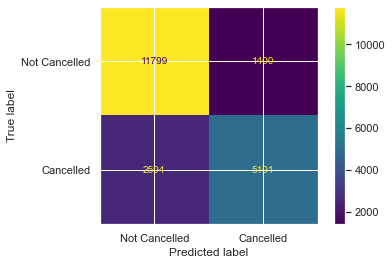

In [569]:
y_train_pred = rf_tuning.predict(X_test)
confusion_matrix_rf_tuned = confusion_matrix(y_test, y_train_pred)

ConfusionMatrixDisplay(confusion_matrix_rf_tuned, display_labels=np.array(['Not Cancelled', 'Cancelled'])).plot()

In [574]:
y_train_pred = rf_tuning.predict(X_train)
print('Classif Report Train Set: \n', classification_report(y_train, y_train_pred))

Classif Report Train Set: 
               precision    recall  f1-score   support

           0       0.82      0.90      0.86     39596
           1       0.79      0.67      0.73     23083

    accuracy                           0.82     62679
   macro avg       0.81      0.79      0.79     62679
weighted avg       0.81      0.82      0.81     62679



In [571]:
print('Classif Report Test Set: \n', classification_report(y_test, y_test_pred))

Classif Report Test Set: 
               precision    recall  f1-score   support

           0       0.83      0.86      0.85     13199
           1       0.75      0.70      0.73      7695

    accuracy                           0.80     20894
   macro avg       0.79      0.78      0.79     20894
weighted avg       0.80      0.80      0.80     20894



In [ ]:
import pickle

model = rf_tuning
pickle_file = pickle.dumps(model)
print(f'This is my model: \n {pickle_file}\n' )

# 7. **CONCLUSION**

1. The best model to predict whether someone will cancel or not on the booking reservation based on the f1_score is Random Forest with or without hyperparameter tuning.
2. The hyperparameter tuning process makes the f1_score in the random forest model slightly decrease by roughly 0.0064, from 0.725 to 0.718. 